In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [14]:
import re 
df = pd.read_excel('projects.xlsx')
df=df[(True) 
      & (df.stargazers > 5000)
      & ()
      & (df['commits'] > 5000)  
      & (df['contributors'] >= 10)  
      & (df.primaryLanguage.notnull()) 
      & (df.description.str.contains('(?i)\\bmirror\\b', na=False) == False)
#     & (df['primaryLanguage'] != 'JavaScript')
]
len(df)

436

In [3]:
pd.set_option('display.max_colwidth', -1) 
df

,owner,name,createdAt,pushedAt,diskUsage,primaryLanguage,languages,contributors,watchers,stargazers,forks,issues,commits,pullRequests,branches,tags,releases,description
0,freeCodeCamp,freeCodeCamp,2014-12-24T17:49:19Z,2019-08-20T22:25:53Z,120266,JavaScript,5,996,8383,304384,22428,13731,24648,22485,6,0,0,The https://www.freeCodeCamp.org open source codebase and curriculum. Learn to code for free together with millions of people.
3,twbs,bootstrap,2011-07-29T21:19:00Z,2019-08-20T16:38:41Z,145715,JavaScript,5,988,7261,135326,66610,18713,18952,10039,57,55,55,"The most popular HTML, CSS, and JavaScript framework for developing responsive, mobile first projects on the web."
4,facebook,react,2013-05-24T16:15:54Z,2019-08-20T22:44:24Z,147836,JavaScript,10,979,6636,134742,25160,7904,11246,8447,31,118,83,"A declarative, efficient, and flexible JavaScript library for building user interfaces."
5,tensorflow,tensorflow,2015-11-07T01:19:20Z,2019-08-20T22:43:31Z,384070,C++,26,892,8585,132825,76828,19609,63170,12039,35,88,84,An Open Source Machine Learning Framework for Everyone
9,robbyrussell,oh-my-zsh,2009-08-28T18:15:37Z,2019-08-20T10:11:39Z,5717,Shell,6,999,2563,93756,17335,2956,5209,5127,1,0,0,"🙃 A delightful community-driven (with 1,300+ contributors) framework for managing your zsh configuration. Includes 200+ optional plugins (rails, git, OSX, hub, capistrano, brew, ant, php, python, etc), over 140 themes to spice up your morning, and an auto-update tool so that makes it easy to keep up with the latest updates from the community."
15,microsoft,vscode,2015-09-03T20:23:38Z,2019-08-20T22:45:51Z,210807,TypeScript,34,979,2786,81566,11581,73031,53393,5717,336,134,0,Visual Studio Code
16,facebook,react-native,2015-01-09T18:10:16Z,2019-08-20T22:05:37Z,399171,JavaScript,18,970,3751,80199,17921,17212,17804,8725,88,323,127,A framework for building native apps with React.
17,torvalds,linux,2011-09-04T22:48:12Z,2019-08-20T18:51:50Z,2619388,C,19,1000,6750,79240,27618,0,856897,683,1,616,0,Linux kernel source tree
18,electron,electron,2013-04-12T01:47:36Z,2019-08-20T22:41:53Z,62567,C++,12,900,2784,76280,10021,11327,22363,8385,129,575,464,":electron: Build cross-platform desktop apps with JavaScript, HTML, and CSS"
20,flutter,flutter,2015-03-06T22:54:58Z,2019-08-20T22:45:55Z,70370,Dart,12,499,2426,73059,8811,24170,15391,14713,16,197,0,Flutter makes it easy and fast to build beautiful mobile apps.


In [4]:
df.describe()

,diskUsage,languages,contributors,watchers,stargazers,forks,issues,commits,pullRequests,branches,tags,releases
count,4.360000e+02,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,2.233970e+05,9.502294,440.944954,881.818807,17832.883028,4435.112385,4862.644495,21734.901376,5072.564220,76.206422,252.227064,68.250000
std,3.679233e+05,6.346507,309.746239,1016.473960,22080.842225,6691.289992,6071.129199,58145.593328,6984.806017,209.608631,859.043422,157.028424
min,5.660000e+03,1.000000,25.000000,31.000000,5002.000000,203.000000,0.000000,5008.000000,65.000000,1.000000,0.000000,0.000000
25%,4.235400e+04,5.000000,172.750000,362.750000,7008.000000,1395.000000,1543.500000,6882.000000,1308.250000,7.000000,55.000000,2.000000
50%,9.421500e+04,8.000000,346.500000,550.500000,10760.000000,2502.000000,3234.500000,10469.500000,2767.500000,18.000000,108.000000,30.500000
75%,2.104762e+05,12.000000,674.000000,988.250000,19180.250000,4629.750000,5972.000000,21091.750000,5743.500000,55.000000,224.000000,84.000000
max,2.619388e+06,46.000000,1000.000000,8585.000000,304384.000000,76828.000000,73031.000000,856897.000000,62878.000000,2530.000000,14428.000000,2741.000000


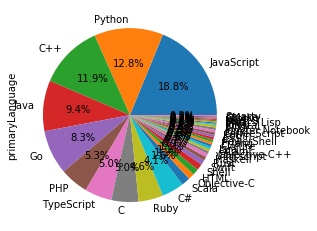

In [5]:
df.primaryLanguage.value_counts().plot(kind='pie', autopct='%1.1f%%')

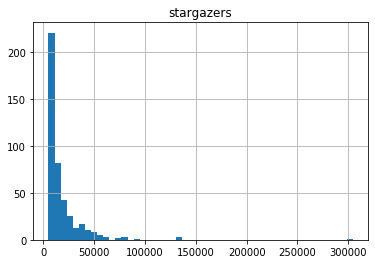

In [6]:
hist = df.hist(column=['stargazers'], bins=50)

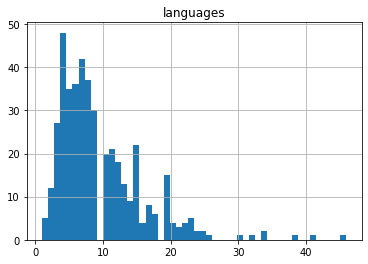

In [7]:
hist = df.hist(column=['languages'], bins=50)

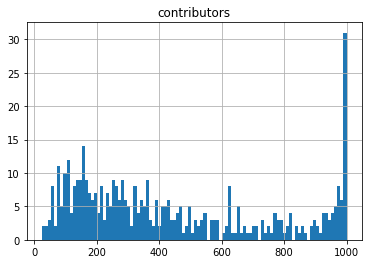

In [8]:
hist = df.hist(column=['contributors'], bins=100)

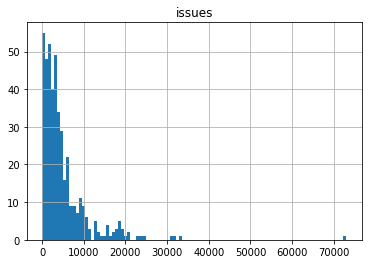

In [9]:
hist = df.hist(column=['issues'], bins=100)

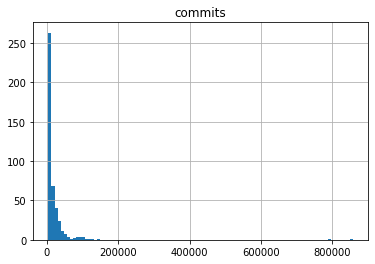

In [10]:
hist = df.hist(column=['commits'], bins=100)

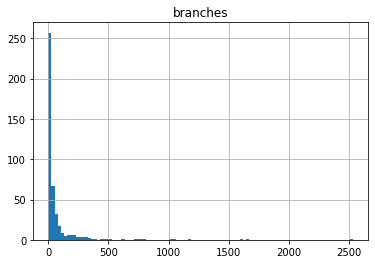

In [11]:
hist = df.hist(column=['branches'], bins=100)

Text(0.5, 0, 'KB')

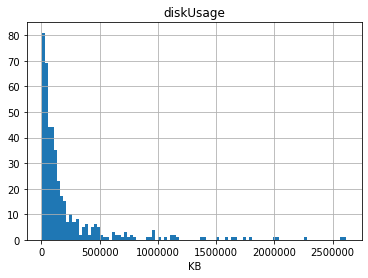

In [12]:
hist = df.hist(column=['diskUsage'], bins=100)
plt.xlabel("KB")

In [13]:
corr = df.corr()
corr.style.background_gradient(cmap='Reds')

,diskUsage,languages,contributors,watchers,stargazers,forks,issues,commits,pullRequests,branches,tags,releases
diskUsage,1,0.27994,0.126982,0.144372,0.0254313,0.124181,0.11176,0.498832,0.208058,0.0859615,0.065076,-0.0108624
languages,0.27994,1,0.181121,0.108849,0.0153603,0.115654,0.138483,0.213404,0.169535,0.183044,0.011594,-0.115195
contributors,0.126982,0.181121,1,0.38811,0.378924,0.454097,0.426773,0.253492,0.556886,0.00228754,0.0514126,0.0879387
watchers,0.144372,0.108849,0.38811,1,0.870384,0.859813,0.405982,0.240761,0.258453,0.00471538,0.0203534,-0.00529768
stargazers,0.0254313,0.0153603,0.378924,0.870384,1,0.689687,0.409442,0.108931,0.244322,0.0206421,0.0450227,0.0339836
forks,0.124181,0.115654,0.454097,0.859813,0.689687,1,0.371714,0.179538,0.322317,-0.0381147,-0.00651805,-0.00152504
issues,0.11176,0.138483,0.426773,0.405982,0.409442,0.371714,1,0.0706794,0.451853,0.0712141,-0.000399615,0.101358
commits,0.498832,0.213404,0.253492,0.240761,0.108931,0.179538,0.0706794,1,0.19474,0.0470431,0.0477465,-0.0383497
pullRequests,0.208058,0.169535,0.556886,0.258453,0.244322,0.322317,0.451853,0.19474,1,0.0951687,0.0203018,0.040734
branches,0.0859615,0.183044,0.00228754,0.00471538,0.0206421,-0.0381147,0.0712141,0.0470431,0.0951687,1,0.48957,-0.0133016
